Confusion matrix for MLP with 1 hidden layer:
[[10995  5538]
 [  508  4775]]


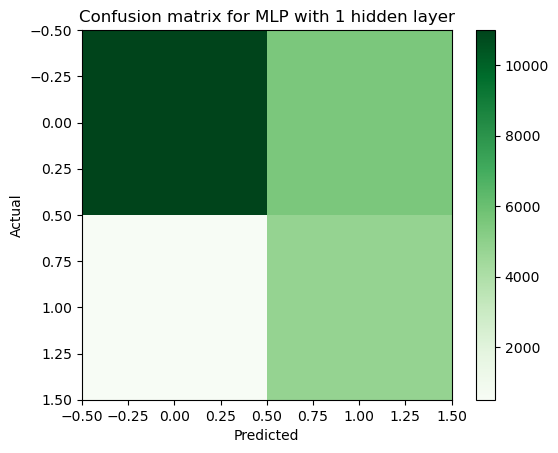

Classification report for MLP with 1 hidden layer:
              precision    recall  f1-score   support

           0       0.96      0.67      0.78     16533
           1       0.46      0.90      0.61      5283

    accuracy                           0.72     21816
   macro avg       0.71      0.78      0.70     21816
weighted avg       0.84      0.72      0.74     21816



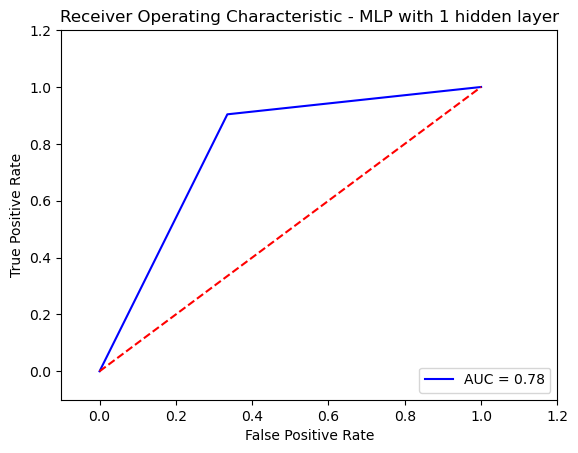

[0.         0.33496643 1.        ]
[0.         0.90384251 1.        ]
Confusion matrix for MLP with 2 hidden layers:
[[16065   468]
 [ 3654  1629]]


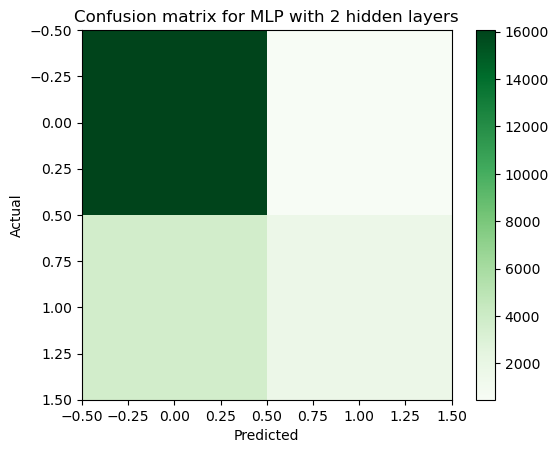

Classification report for MLP with 2 hidden layers:
              precision    recall  f1-score   support

           0       0.81      0.97      0.89     16533
           1       0.78      0.31      0.44      5283

    accuracy                           0.81     21816
   macro avg       0.80      0.64      0.66     21816
weighted avg       0.81      0.81      0.78     21816



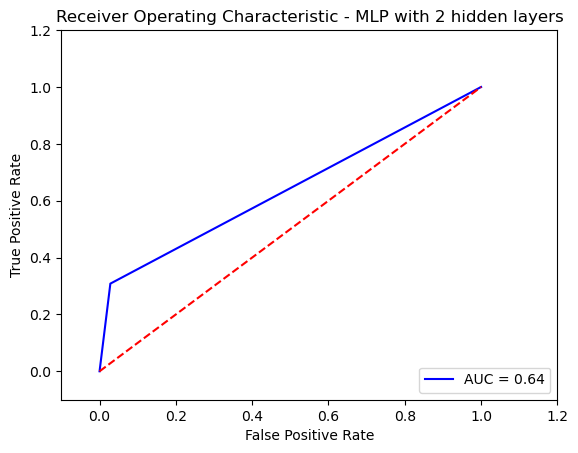

[0.         0.02830702 1.        ]
[0.         0.30834753 1.        ]
Confusion matrix for MLP with 3 hidden layers:
[[14658  1875]
 [ 1999  3284]]


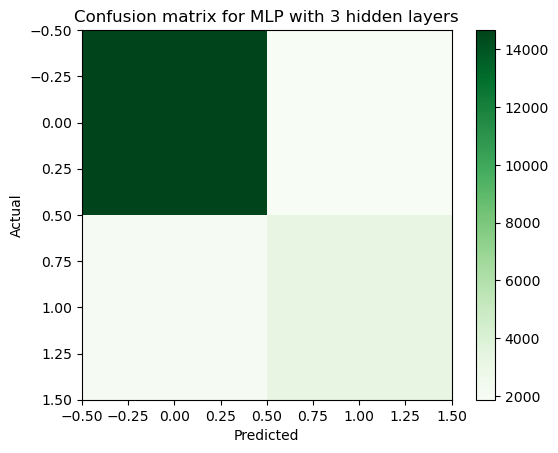

Classification report for MLP with 3 hidden layers:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     16533
           1       0.64      0.62      0.63      5283

    accuracy                           0.82     21816
   macro avg       0.76      0.75      0.76     21816
weighted avg       0.82      0.82      0.82     21816



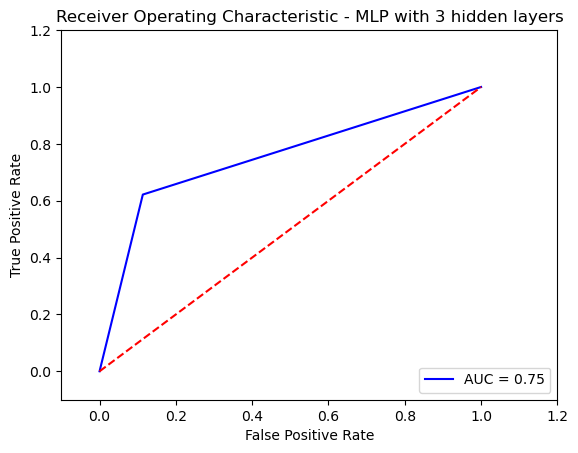

[0.         0.11340954 1.        ]
[0.         0.62161651 1.        ]


In [6]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_curve, auc

dataframe = pd.read_csv("combined.csv")
X = dataframe.iloc[1:, :-1]  # All rows except the first one, all columns except the last one
y = dataframe.iloc[1:, -1]  # All rows except the first one, the last column

# Encode the target variable into numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.67, random_state=42)

classifiers = [
    ('MLP with 1 hidden layer', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)),
    ('MLP with 2 hidden layers', MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)),
    ('MLP with 3 hidden layers', MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000))
]

for title, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion matrix for {title}:')
    print(cm)

    # Plot the confusion matrix
    plt.imshow(cm, cmap='Greens')
    plt.title(f'Confusion matrix for {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.colorbar()
    plt.show()

    # Print the classification report
    print(f'Classification report for {title}:')
    print(classification_report(y_test, y_pred))

    # Calculate ROC curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    # Plot ROC curve
    plt.title(f'Receiver Operating Characteristic - {title}')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.2])
    plt.ylim([-0.1, 1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print(false_positive_rate)
    print(true_positive_rate)
